# `43-Linear Regression Boston Housing`

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [3]:
# from sklearn.datasets import load_boston
# boston = load_boston()

# # Create DataFrame
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['MEDV'] = boston.target

### Understanding Boston Dataset
These datasets are pre-build datasets in sklearn. To load and return the boston house-prices dataset (regression).

- Samples total - 506
- Dimensionality - 13
- Features - real, positive
- Targets - real 5. - 50.

**Description of Boston Dataset in Sklearn**

The Boston Housing dataset contains several columns that are used to describe various aspects of residential homes in Boston. Here is a description of each column in the dataset:

- **CRIM**: Per capita crime rate by town. It indicates the level of crime in the area.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature reflects the area's residential density.
- **INDUS**: Proportion of non-retail business acres per town. This is an indicator of the commercial use of land away from residential areas.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This indicates whether the property is near the Charles River, which may add to the aesthetic value of the neighborhood.
- **NOX**: Nitric oxides concentration (parts per 10 million). It represents the level of industrial pollutants in the area.
- **RM**: Average number of rooms per dwelling. More rooms typically indicate more spacious accommodation.
- **AGE**: Proportion of owner-occupied units built prior to 1940. Older structures might lack newer amenities or could be considered more prestigious depending on the architecture and condition.
- **DIS**: Weighted distances to five Boston employment centres. This feature measures the accessibility to workplaces, which can influence housing prices.
- **RAD**: Index of accessibility to radial highways. Higher values indicate easier access to major roadways.
- **TAX**: Full-value property-tax rate per $10,000. This reflects the annual property tax rate.
- **PTRATIO**: Pupil-teacher ratio by town. Lower values typically indicate better educational facilities, which is a significant factor for families when choosing a home.

In [22]:
bs = pd.read_csv("BostonHousing.csv")

In [24]:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [26]:
bs.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [28]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
bs.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### 2.1 Data Preprocessing

<Axes: >

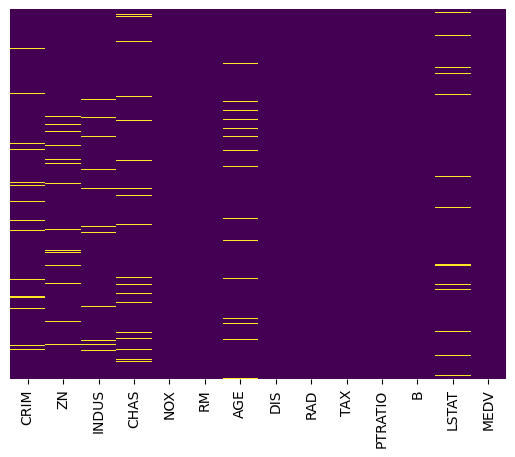

In [35]:
sns.heatmap(bs.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### 2.1.3 Removing Nulls

In [82]:
#flling nulls
bs.fillna(bs.mean(), inplace=True)

In [39]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# 3. Data Insights

In [42]:
sns.set_palette("Set1", 8, .75)
sns.set_style("darkgrid")

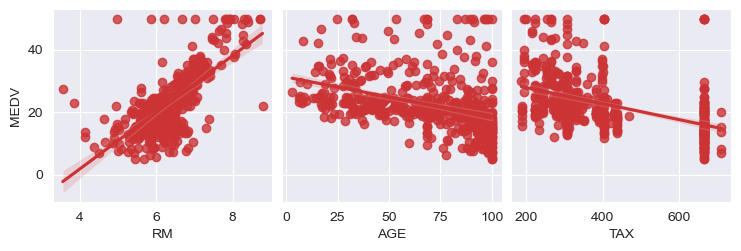

In [44]:
sns.pairplot(bs, x_vars=['RM', 'AGE', 'TAX'], y_vars='MEDV', kind='reg')
plt.show()

# 4. Training and Testing Data

In [47]:
bs.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [49]:
X = bs.drop('MEDV', axis=1)
y = bs['MEDV']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Model

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y Prediction')

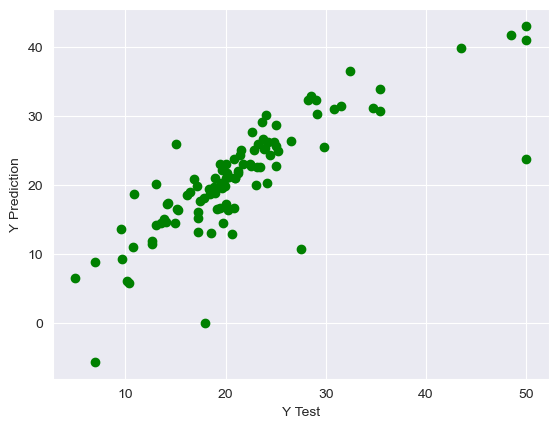

In [62]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

# 5. Evaluating Model

In [65]:
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  27.91246520103061
Coefficients:  [-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]


In [67]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3.1499233573457928
MSE:  25.017672023842806
RMSE:  5.001766890194185


In [69]:
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

R2 Score:  0.6588520195508125


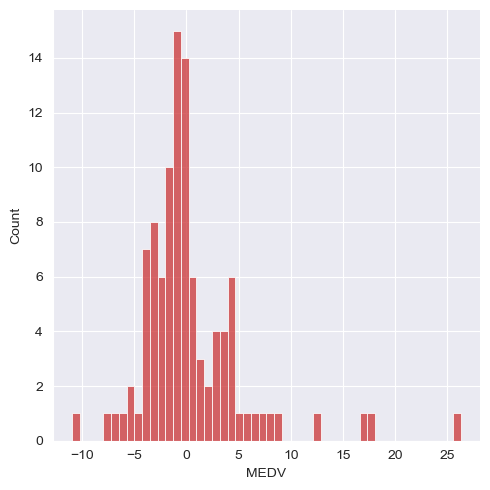

In [78]:
sns.displot(y_test-y_pred, bins=50)

In [71]:
coef_bs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_bs

,Coefficient
CRIM,-0.114140
ZN,0.029016
INDUS,-0.027133
CHAS,3.240673
NOX,-16.017543
RM,4.752410
AGE,-0.019520
DIS,-1.521593
RAD,0.222823
TAX,-0.009151


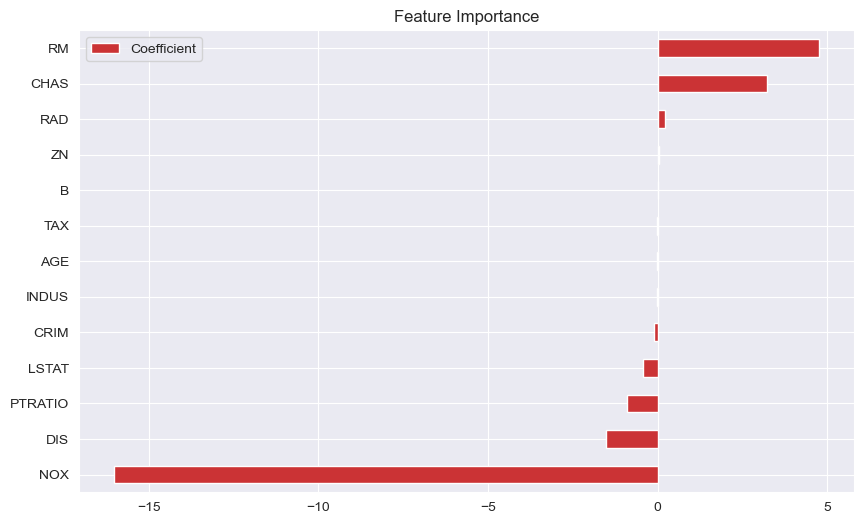

In [73]:
coef_bs.sort_values(by='Coefficient').plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.show()

# 6. Predict New Data

In [76]:
new_data = pd.DataFrame([X.mean().values], columns=X.columns)

predicted_price = model.predict(new_data)
print("Predicted House Price: ", predicted_price[0])

Predicted House Price:  22.460391368904286
